https://opendatascience.com/intro-to-natural-language-processing/

In [1]:
!pip install nltk
import nltk
#per risolvere un bug, altrimenti da errore
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#tokenizer
def format_sentence(sent):
  return({word: True for word in nltk.word_tokenize(sent)})

#Tweets

In [3]:
print(nltk.word_tokenize("The cat is very cute"))

['The', 'cat', 'is', 'very', 'cute']


##X_train, y_train, X_test, y_test

In [0]:
#   X + y
#se chiamiamo a al di fuori di questo slot non funziona
total = open('/content/drive/My Drive/Colab Notebooks/Projects/20200602_Twitter_Sentiment_Analysis/pos_tweets.txt')
X_pos = list()
y_pos = list()
#word tokenization
for sentence in total:
  #print(sentence)
  X_pos.append([format_sentence(sentence)])
  y_pos.append(0)
  #saves the sentence in format: [{tokenized sentence}, 'pos]
#X_pos

In [0]:
#   X + y
#se chiamiamo a al di fuori di questo slot non funziona
total = open('/content/drive/My Drive/Colab Notebooks/Projects/20200602_Twitter_Sentiment_Analysis/pos_tweets.txt')
X_neg = list()
y_neg = list()
#word tokenization
for sentence in total:
  #print(sentence)
  X_neg.append([format_sentence(sentence)])
  y_neg.append(1)
  #saves the sentence in format: [{tokenized sentence}, 'pos]
#X_neg

In [9]:
X_pos[0]

[{"''": True,
  "'m": True,
  ',': True,
  '.': True,
  ':': True,
  'Ballads': True,
  'Cellos': True,
  'Genius': True,
  'I': True,
  '``': True,
  'and': True,
  'by': True,
  'called': True,
  'cheer': True,
  'down': True,
  'iPod': True,
  'listening': True,
  'love': True,
  'music': True,
  'my': True,
  'myself': True,
  'of': True,
  'playlist': True,
  'taste': True,
  'to': True,
  'up': True,
  'when': True}]

In [10]:
X = X_pos + X_neg
y = y_pos + y_neg
print(len(X), len(y))

1234 1234


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

987 247 987 247


In [0]:
#we can use Embedding layers
#we can use a ML algorithm that takes X_train, y_train, X_test, y_test

In [0]:
#per SGD classifier i dati devono essere numerically encoded, not dict
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
valid_score = clf.score(X_valid, y_valid)

##Xy_train, Xy_test

In [0]:
#   X + y
#se chiamiamo a al di fuori di questo slot non funziona
total = open('/content/drive/My Drive/Colab Notebooks/Projects/20200602_Twitter_Sentiment_Analysis/pos_tweets.txt')
Xy_pos = list()
#word tokenization
for sentence in total:
  #print(sentence)
  Xy_pos.append([format_sentence(sentence), 'pos'])
  #saves the sentence in format: [{tokenized sentence}, 'pos]
#Xy_pos

In [0]:
#   X + y
#se chiamiamo a al di fuori di questo slot non funziona
total = open('/content/drive/My Drive/Colab Notebooks/Projects/20200602_Twitter_Sentiment_Analysis/neg_tweets.txt')
Xy_neg = list()
#word tokenization
for sentence in total:
  #print(sentence)
  Xy_neg.append([format_sentence(sentence), 'neg'])
  #saves the sentence in format: [{tokenized sentence}, 'pos]
#Xy_neg

In [35]:
len(Xy_neg)

1387

In [33]:
Xy_pos[0]

[{"''": True,
  "'m": True,
  ',': True,
  '.': True,
  ':': True,
  'Ballads': True,
  'Cellos': True,
  'Genius': True,
  'I': True,
  '``': True,
  'and': True,
  'by': True,
  'called': True,
  'cheer': True,
  'down': True,
  'iPod': True,
  'listening': True,
  'love': True,
  'music': True,
  'my': True,
  'myself': True,
  'of': True,
  'playlist': True,
  'taste': True,
  'to': True,
  'up': True,
  'when': True},
 'pos']

In [0]:
def split(pos, neg, ratio):
  train = pos[:int((1-ratio)*len(pos))] + neg[:int((1-ratio)*len(neg))]
  test = pos[int((ratio)*len(pos)):] + neg[int((ratio)*len(neg)):]
  return train, test

Xy_train, Xy_test = split(Xy_pos, Xy_neg, 0.1)

In [25]:
from nltk.classify import NaiveBayesClassifier

#encoded thorugh dictionaries
classifier = NaiveBayesClassifier.train(Xy_train)
classifier.show_most_informative_features()

Most Informative Features
                      no = True              neg : pos    =     20.6 : 1.0
                 awesome = True              pos : neg    =     18.7 : 1.0
                headache = True              neg : pos    =     18.0 : 1.0
               beautiful = True              pos : neg    =     14.2 : 1.0
                    love = True              pos : neg    =     14.2 : 1.0
                      Hi = True              pos : neg    =     12.7 : 1.0
                    glad = True              pos : neg    =      9.7 : 1.0
                   Thank = True              pos : neg    =      9.7 : 1.0
                     fan = True              pos : neg    =      9.7 : 1.0
                    lost = True              neg : pos    =      9.3 : 1.0


In [26]:
example2 = "beautiful"
print(classifier.classify(format_sentence(example2)))

pos


In [27]:
from nltk.classify.util import accuracy
print(accuracy(classifier, Xy_test))

0.9562326869806094


##Movies

In [0]:
import pandas as pd
total = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/20200602_Twitter_Sentiment_Analysis/movie_review.csv')
total

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos
...,...,...,...,...,...,...
64715,9,cv999,14636,20,that lack of inspiration can be traced back to...,neg
64716,9,cv999,14636,21,like too many of the skits on the current inca...,neg
64717,9,cv999,14636,22,"after watching one of the "" roxbury "" skits on...",neg
64718,9,cv999,14636,23,"bump unsuspecting women , and . . . that's all .",neg


In [0]:
total_positive = total.copy()
total_positive.columns
total_positive = total_positive.loc[total_positive['tag'] == 'pos']
#total_positive = total_positive.pop('text')
total_positive = total_positive.drop(['fold_id', 'cv_tag', 'html_id', 'sent_id'], axis=1)
total_positive

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
...,...,...
32932,"it's a quick , straight shot to the movie's end .",pos
32933,"in terms of overall quality , i would compare ...",pos
32934,both films are well made with interesting stor...,pos
32935,but neither film really felt like it capitaliz...,pos


In [0]:
total_negative = total.copy()
total_negative.columns
total_negative = total_negative.loc[total_negative['tag'] == 'neg']
#total_negative = total_negative.pop('text')
total_negative = total_negative.drop(['fold_id', 'cv_tag', 'html_id', 'sent_id'], axis=1)
total_negative

,text,tag
32937,"plot : two teen couples go to a church party ,...",neg
32938,they get into an accident .,neg
32939,"one of the guys dies , but his girlfriend cont...",neg
32940,what's the deal ?,neg
32941,"watch the movie and "" sorta "" find out . . .",neg
...,...,...
64715,that lack of inspiration can be traced back to...,neg
64716,like too many of the skits on the current inca...,neg
64717,"after watching one of the "" roxbury "" skits on...",neg
64718,"bump unsuspecting women , and . . . that's all .",neg


In [0]:
format_sentence('how are you')

{'are': True, 'how': True, 'you': True}

In [0]:
#   tokenizer
#input: series, ?lists?
def create_dict(total_positive, total_negative):
  
  positive_reviews = list()
  #word tokenization
  for sentence in list(total_positive.values):
    positive_reviews.append([format_sentence(sentence[0]), 'pos'])
    #saves the sentence in format: [{tokenized sentence}, 'pos]
  
  negative_reviews = list()
  #word tokenization
  for sentence in list(total_negative.values):
    #print(sentence)
    negative_reviews.append([format_sentence(sentence[0]), 'neg'])
    #saves the sentence in format: [{tokenized sentence}, 'pos]
  
  return positive_reviews, negative_reviews

positive_reviews, negative_reviews = create_dict(total_positive, total_negative)

In [0]:
X = pd.concat([total_positive, total_negative], axis=0)
X.columns = ['text', 'sentiment']
X

,text,sentiment
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
...,...,...
64715,that lack of inspiration can be traced back to...,neg
64716,like too many of the skits on the current inca...,neg
64717,"after watching one of the "" roxbury "" skits on...",neg
64718,"bump unsuspecting women , and . . . that's all .",neg


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


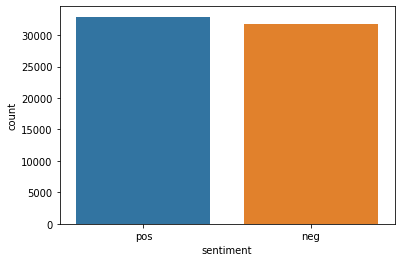

In [0]:
import seaborn as sns
sns.countplot(x='sentiment', data=X)

In [0]:
y = pd.DataFrame(X.pop('sentiment'))
y

,sentiment
0,pos
1,pos
2,pos
3,pos
4,pos
...,...
64715,neg
64716,neg
64717,neg
64718,neg


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
X_train['text'][0]

"films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before ."

In [0]:
##del?
def preprocess_text(sen):
  # Removing html tags
  sentence = remove_tags(sen)

  # Remove punctuations and numbers
  sentence = re.sub('[^a-zA-Z]', ' ', sentence)

  # Single character removal
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

  # Removing multiple spaces
  sentence = re.sub(r'\s+', ' ', sentence)

  return sentence

TAG_RE = re.compile(r'<[^>]+>')
#replaces anything between <> with an empty space
def remove_tags(text):
    return TAG_RE.sub('', text)

In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts('come stai')
tokenizer.texts_to_sequences('come stai')

[[1], [2], [3], [4], [], [5], [6], [7], [8]]

In [0]:
#del?
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
  X.append(preprocess_text(sen))

In [0]:
print(len(positive_reviews))
print(len(negative_reviews))

32937
31783


In [0]:
train = positive_reviews[:int((.9)*len(positive_reviews))] + negative_reviews[:int((.9)*len(negative_reviews))]
test = positive_reviews[int((.1)*len(positive_reviews)):] + negative_reviews[int((.1)*len(negative_reviews)):]
print(len(train), len(test))

58247 58249


In [0]:
print(train[0])

[{'films': True, 'adapted': True, 'from': True, 'comic': True, 'books': True, 'have': True, 'had': True, 'plenty': True, 'of': True, 'success': True, ',': True, 'whether': True, 'they': True, "'re": True, 'about': True, 'superheroes': True, '(': True, 'batman': True, 'superman': True, 'spawn': True, ')': True, 'or': True, 'geared': True, 'toward': True, 'kids': True, 'casper': True, 'the': True, 'arthouse': True, 'crowd': True, 'ghost': True, 'world': True, 'but': True, 'there': True, "'s": True, 'never': True, 'really': True, 'been': True, 'a': True, 'book': True, 'like': True, 'hell': True, 'before': True, '.': True}, 'pos']


In [0]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train)
classifier.show_most_informative_features()

Most Informative Features
                   mulan = True              pos : neg    =     58.2 : 1.0
                   flynt = True              pos : neg    =     44.7 : 1.0
                     8mm = True              neg : pos    =     28.0 : 1.0
                lebowski = True              pos : neg    =     27.3 : 1.0
                bulworth = True              pos : neg    =     21.8 : 1.0
                margaret = True              pos : neg    =     20.9 : 1.0
                  seagal = True              neg : pos    =     20.5 : 1.0
                   homer = True              pos : neg    =     20.3 : 1.0
                   magoo = True              neg : pos    =     19.7 : 1.0
                  hudson = True              neg : pos    =     19.0 : 1.0


In [0]:
example2 = "mulan"
print(classifier.classify(format_sentence(example2)))

pos


In [0]:
from nltk.classify.util import accuracy
print(accuracy(classifier, test))

0.7845971604662741
